In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "T5t3hgjjzRhPZNWceBIT1pZ6t"
Consumer_Secret_Key = "6mFaxpMxlPfctWScmWcvp37ikalQw1pqCCm90MHNteomHiVPEW"
Access_Token = "1458094172934754316-5C0hqnrCfgvrh0YQ4QQ9sYQLSSJ4HB"
Access_Token_Secret = "ajSCcCrzpUlzCw0Ttiwp2UOrwc3F4ltFIHfXqEMvKuHer"

In [5]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [6]:
posts = api.user_timeline(screen_name = "ShopeeSG", count = 199, tweet_mode = "extended")

print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(1)+')'+ tweet.full_text+ '\n')
  i=i+1

Show the 5 recent tweets:

1)Need some ideas for your Secret Santee's present? Or your family or friends. Here's some inspiration 🎄🧑‍🎄

#ShopeeSGXmasSale https://t.co/1yKUggSjz6

1)Well we know VTLs are pretty much open to Korea and Europe (sort of) but who here misses Japan as much as we do too 😢😢😢😢 https://t.co/x5NEwRyRtB

1)Which K-Pop song would you want on repeat at an after party? 🤪

1)@hell_twisted Hi there, we apologise for your negative experience with us. Could you drop us a DM with your Shopee username and Order ID - so we could check on this! Thank you for your patience.

1)We love it 😍😍 Wish we could have a taste of your Army Stew 🤤🤤

Psst.. don't be shy and show us some of your 12.12 #ShopeeSGHauls 🤪 https://t.co/JsC98SsXQ9



In [7]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Need some ideas for your Secret Santee's prese...
1,Well we know VTLs are pretty much open to Kore...
2,Which K-Pop song would you want on repeat at a...
3,"@hell_twisted Hi there, we apologise for your ..."
4,We love it 😍😍 Wish we could have a taste of yo...


In [8]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\s+', '', text)
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,Need some ideas for your Secret Santee's prese...
1,Well we know VTLs are pretty much open to Kore...
2,Which K-Pop song would you want on repeat at a...
3,"_twisted Hi there, we apologise for your negat..."
4,We love it 😍😍 Wish we could have a taste of yo...
...,...
194,It's about the time of the night for supper......
195,To avoid such situations - tell her to just sh...
196,_members Hi there! You would have to submit t...
197,Calling all ENGENEs 😍 ENHYPEN has a special me...


In [9]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,subjectivity,Polarity
0,Need some ideas for your Secret Santee's prese...,0.350000,-0.200000
1,Well we know VTLs are pretty much open to Kore...,0.566667,0.150000
2,Which K-Pop song would you want on repeat at a...,0.000000,0.000000
3,"_twisted Hi there, we apologise for your negat...",0.700000,-0.437500
4,We love it 😍😍 Wish we could have a taste of yo...,0.550000,0.000000
...,...,...,...
194,It's about the time of the night for supper......,0.000000,0.000000
195,To avoid such situations - tell her to just sh...,0.500000,0.000000
196,_members Hi there! You would have to submit t...,0.000000,0.000000
197,Calling all ENGENEs 😍 ENHYPEN has a special me...,0.571429,0.446429


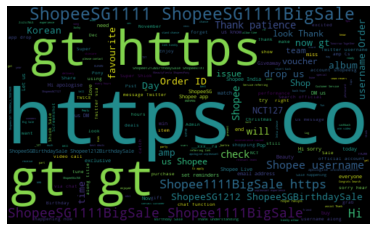

In [10]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [11]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis

def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,subjectivity,Polarity,Analysis
0,Need some ideas for your Secret Santee's prese...,0.350000,-0.200000,negative
1,Well we know VTLs are pretty much open to Kore...,0.566667,0.150000,positive
2,Which K-Pop song would you want on repeat at a...,0.000000,0.000000,neutral
3,"_twisted Hi there, we apologise for your negat...",0.700000,-0.437500,negative
4,We love it 😍😍 Wish we could have a taste of yo...,0.550000,0.000000,neutral
...,...,...,...,...
194,It's about the time of the night for supper......,0.000000,0.000000,neutral
195,To avoid such situations - tell her to just sh...,0.500000,0.000000,neutral
196,_members Hi there! You would have to submit t...,0.000000,0.000000,neutral
197,Calling all ENGENEs 😍 ENHYPEN has a special me...,0.571429,0.446429,positive


In [12]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1) Need some ideas for your Secret Santee's present? Or your family or friends. Here's some inspiration 🎄🧑‍🎄

ShopeeSGXmasSale https://t.co/1yKUggSjz6

2) _twisted Hi there, we apologise for your negative experience with us. Could you drop us a DM with your Shopee username and Order ID - so we could check on this! Thank you for your patience.

3)    We're sorry for this. Could you drop is a DM with your Shopee username and Order ID - so we could get our team to look into this. Thank you.

4)       Hi there, we apologise for your negative experience. Could you drop us your Shopee username and Order ID- so that the team can check on this. Thank you for your patience.

5) Curious about what gifts Koreans of different ages like to receive? 🧐 Keep these in mind for the next time you have to get your Korean chingu a birthday present! 🥳

ShopeeSG1212 ShopeeSGBirthdaySale Shopee1212BirthdaySale https://t.co/jZtbzl6gSv

6) 4 days to $200k worth of giveaways every 2 hours, $60 

In [13]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1) Well we know VTLs are pretty much open to Korea and Europe (sort of) but who here misses Japan as much as we do too 😢😢😢😢 https://t.co/x5NEwRyRtB

2) Me doing a whole photoshoot while my pet just stands there in a ridiculous Christmas outfit like 👁️👄👁️

Gotten all your Christmas necessities yet? Be sure to grab them at our 12.12 After Party Sale 🥳🎄 &gt;&gt; https://t.co/mCBhrMucjH

ShopeeSGXmasSale https://t.co/naiCi4EqAK

3) DIVE, IVE has a message for you!❤️ Purchase their 1st Single Album, 'Eleven' here and stand a chance to win a video call with them!🥰️ &gt;&gt; https://t.co/sCVD6YuRe2

*T&amp;Cs apply: https://t.co/ipG4qeFA2d

 ShopeexIVE IVE IVE_ELEVEN ShopeeSGxIVE https://t.co/h2UiXvmGZE

4) [Giveaway] Win a IVE album!🤩

Simply:
1. Follow Shopee’s Official Twitter Account
2. Retweet
3. Reply and tag a fellow DIVE~

Grab 's 1st Single album now to win a video call with them!💖Giveaway ends 19 Dec, 23:59 ShopeexIVE IVE ELEVEN ShopeeSGxIVE https://t.co/BEHWlxLmYk

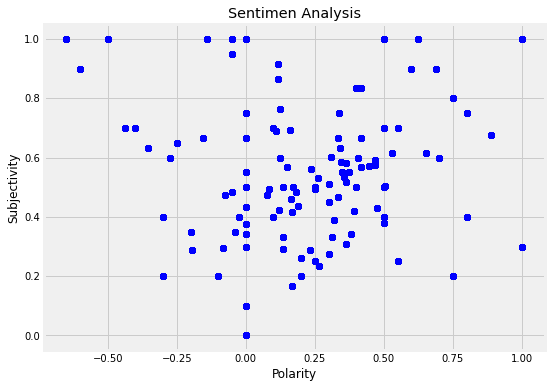

In [14]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'], df['subjectivity'], color='b')

plt.title('Sentimen Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
  

In [15]:
potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

48.7

In [16]:
netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

16.1

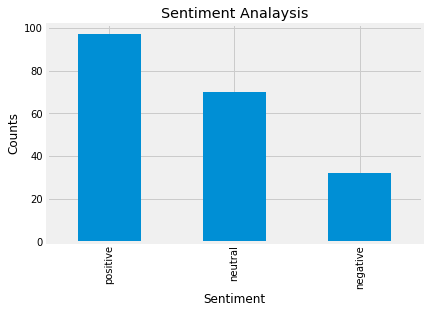

In [17]:
df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()